# PANDAS

In [17]:
import pandas as pd
import numpy as np
student_1 = {"수학":90, "영어":80, "과학":95, "미술":80}
student_2 = {"수학":70, "영어":90, "과학":100, "미술":70}

index_1 = ['홍길동' for i in range(len(student_1))] + ['이몽룡' for i in range(len(student_2))]
# index_1 = ['홍길동', '홍길동', '홍길동', '홍길동', '이몽룡', '이몽룡', '이몽룡', '이몽룡']

index_2 = [i for i in student_1] + [i for i in student_2]
# index_2 = ["수학", "영어", "과학", "미술", "수학", "영어", "과학", "미술"]

value_all = list(student_1.values()) + list(student_2.values())
print(value_all)
students = pd.Series(value_all, index=[index_1, index_2])

print(students)

[90, 80, 95, 80, 70, 90, 100, 70]
홍길동  수학     90
     영어     80
     과학     95
     미술     80
이몽룡  수학     70
     영어     90
     과학    100
     미술     70
dtype: int64


# 날짜 함수
### 날짜 형식
- yyyy-mm-dd
- yyyy/mm/dd
- yyyy.mm.dd
- mm-dd-yyyy
- mm/dd/yyyy

In [58]:
# 날짜 자동 생성
print(pd.date_range(start='2021-05-15', end='2021-05-18'))

DatetimeIndex(['2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18'], dtype='datetime64[ns]', freq='D')


In [59]:
#기간 사용
print(pd.date_range(start='2021-05-18', periods=7))

DatetimeIndex(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24'],
              dtype='datetime64[ns]', freq='D')


In [60]:
#증감
print(pd.date_range(start='2021-05-18', periods=7, freq='2D'))
print(pd.date_range(start='2021-05-18', periods=7, freq='W'))

DatetimeIndex(['2021-05-18', '2021-05-20', '2021-05-22', '2021-05-24',
               '2021-05-26', '2021-05-28', '2021-05-30'],
              dtype='datetime64[ns]', freq='2D')
DatetimeIndex(['2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04'],
              dtype='datetime64[ns]', freq='W-SUN')


In [61]:
#날짜형
x = pd.to_datetime(['2021-05-18 03:45', '2021-12-24 23:59'])
print(x)
print(x.year)
print(x.weekday)
diff = x - pd.to_datetime('2021-06-18 15:39')
print(diff)

DatetimeIndex(['2021-05-18 03:45:00', '2021-12-24 23:59:00'], dtype='datetime64[ns]', freq=None)
Int64Index([2021, 2021], dtype='int64')
Int64Index([1, 4], dtype='int64')
TimedeltaIndex(['-32 days +12:06:00', '189 days 08:20:00'], dtype='timedelta64[ns]', freq=None)


# 실습 01

In [18]:
x = [np.nan, 1, 2, 3, 4, 5]
y = pd.Series([x[np.random.randint(0,6)] for i in range(20)])

print("1 : {0}\n".format(y.isnull().sum())) # null갯수
print("2 : \n{0}\n".format(y.dropna())) # 평균값

temp = y.mean() # null 제외한 평균 구하기
print(y.fillna(temp)) # 평균으로 결측값 채우기

1 : 4

2 : 
0     3.0
1     3.0
2     4.0
4     3.0
5     5.0
6     1.0
7     4.0
8     1.0
9     1.0
10    5.0
12    4.0
14    5.0
15    3.0
17    2.0
18    1.0
19    2.0
dtype: float64

0     3.0000
1     3.0000
2     4.0000
3     2.9375
4     3.0000
5     5.0000
6     1.0000
7     4.0000
8     1.0000
9     1.0000
10    5.0000
11    2.9375
12    4.0000
13    2.9375
14    5.0000
15    3.0000
16    2.9375
17    2.0000
18    1.0000
19    2.0000
dtype: float64


# Column(데이터) 추가

In [165]:
sales_data = {
 '연도':[2015, 2016, 2017, 2018, 2019, 2020],
 '판매량':[103, 70, 130, 160, 190, 230],
 '매출':[500000, 300000, 400000, 550000, 700000, 680000],
 '순이익':[370000, 190000, 300000, 480000, 600000, 590000]
}
#df =  pd.DataFrame(sales_data)
#print(df)

In [46]:
pd.DataFrame(sales_data, columns=['판매량','매출','순이익'], index=df['연도'])

{'연도': [2015, 2016, 2017, 2018, 2019, 2020], '판매량': [103, 70, 130, 160, 190, 230], '매출': [500000, 300000, 400000, 550000, 700000, 680000], '순이익': [370000, 190000, 300000, 480000, 600000, 590000]}


In [145]:
def check(n):
    if n>80:
        return '높음'
    else :
        return '낮음'

In [167]:
sales_data = pd.DataFrame(sales_data)
sales_data['순이익율'] = (sales_data['순이익']/sales_data['매출']) * 100

# sales_data['순이익율_비교'] = sales_data['순이익율'].apply(check)
sales_data['순이익율_비교'] = sales_data['순이익율'].apply(lambda x:'높음' if x > 80 else '낮음')
sales_data

,연도,판매량,매출,순이익,순이익율,순이익율_비교
0,2015,103,500000,370000,74.000000,낮음
1,2016,70,300000,190000,63.333333,낮음
2,2017,130,400000,300000,75.000000,낮음
3,2018,160,550000,480000,87.272727,높음
4,2019,190,700000,600000,85.714286,높음
5,2020,230,680000,590000,86.764706,높음


In [77]:
# 인덱스에 조건 가능
sales_data = pd.DataFrame(sales_data)
sales_data[sales_data['매출'] > 300000]

# 해당 조건에 일치하는것만 데이터 변경 np.where(조건, True일경우, False일경우)
sales_data['테스트1'] = np.where(sales_data['판매량'] > 200, 0, sales_data['판매량'])

# 해당 조건에 일치하는것만 바꾸고 나머지는 NaN
sales_data['테스트2'] = sales_data[sales_data['판매량'] < 100]['판매량'] + 50
print(sales_data)
# 행추가
sales_data.loc[6] = [2021, 720000,650000, 360, 0, 0]
sales_data.loc[7] = sales_data.loc[5] + 100

     연도  판매량      매출     순이익  테스트1   테스트2
0  2015  103  500000  370000   103    NaN
1  2016   70  300000  190000    70  120.0
2  2017  130  400000  300000   130    NaN
3  2018  160  550000  480000   160    NaN
4  2019  190  700000  600000   190    NaN
5  2020  230  680000  590000     0    NaN


# 데이터 병합

In [62]:
sales_data1 = {
 '연도':[2015, 2016, 2017, 2018],
 '판매량':[103, 70, 130, 160],
 '매출':[500000, 300000, 400000, 550000],
 '순이익':[370000, 190000, 300000, 480000]
}
sales_data2 = {
 '연도':[2019, 2020],
 '판매량':[190, 230],
 '매출':[700000, 680000],
 '순이익':[ 600000, 590000]
}

In [168]:
sales_df1 = pd.DataFrame(sales_data1)
sales_df2 = pd.DataFrame(sales_data2)
print(sales_df1)
print(sales_df2)

     연도  판매량      매출     순이익
0  2015  103  500000  370000
1  2016   70  300000  190000
2  2017  130  400000  300000
3  2018  160  550000  480000
     연도  판매량      매출     순이익
0  2019  190  700000  600000
1  2020  230  680000  590000


In [176]:
# append
sales_df1.append(sales_df2, ignore_index=True) #인덱스 새로설정 False 면 원래쓰던 인덱스 사용
# sales_df1.append(sales_df2, ignore_index=False)
# 합친 값을 sales_df1에 저장하지는 않았다. axis = 1 열방향 결합

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000


In [175]:
# concat
pd.concat([sales_df1, sales_df2], ignore_index=True)#인덱스 새로설정 False 면 원래쓰던 인덱스 사용
# pd.concat([sales_df1, sales_df2], ignore_index=False)
# 합친 값을 sales_df1에 저장하지는 않았다.

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000


In [66]:
cost_data = {
 '연도':[2015, 2016, 2017, 2018],
 '이자':[1520, 1120, 1360, 1680],
 '관리비':[650, 400, 750, 800],
 '세금':[12000, 8900, 10900, 12800] }
cost_data = pd.DataFrame(cost_data)
print(cost_data)

     연도    이자  관리비     세금
0  2015  1520  650  12000
1  2016  1120  400   8900
2  2017  1360  750  10900
3  2018  1680  800  12800


In [178]:
sales_df = pd.concat([sales_df1, sales_df2], ignore_index=True)

In [180]:
# merge
print(pd.merge(sales_df, cost_data, on='연도', how='inner'))
print(pd.merge(sales_df, cost_data, on='연도', how='outer'))
print(pd.merge(sales_df, cost_data, on='연도', how='left'))
print(pd.merge(sales_df, cost_data, on='연도', how='right'))

     연도  판매량      매출     순이익    이자  관리비     세금
0  2015  103  500000  370000  1520  650  12000
1  2016   70  300000  190000  1120  400   8900
2  2017  130  400000  300000  1360  750  10900
3  2018  160  550000  480000  1680  800  12800
     연도  판매량      매출     순이익      이자    관리비       세금
0  2015  103  500000  370000  1520.0  650.0  12000.0
1  2016   70  300000  190000  1120.0  400.0   8900.0
2  2017  130  400000  300000  1360.0  750.0  10900.0
3  2018  160  550000  480000  1680.0  800.0  12800.0
4  2019  190  700000  600000     NaN    NaN      NaN
5  2020  230  680000  590000     NaN    NaN      NaN
     연도  판매량      매출     순이익      이자    관리비       세금
0  2015  103  500000  370000  1520.0  650.0  12000.0
1  2016   70  300000  190000  1120.0  400.0   8900.0
2  2017  130  400000  300000  1360.0  750.0  10900.0
3  2018  160  550000  480000  1680.0  800.0  12800.0
4  2019  190  700000  600000     NaN    NaN      NaN
5  2020  230  680000  590000     NaN    NaN      NaN
     연도  판매량      매출   

# 데이터(Column) 삭제

In [111]:
sales_data = {
 '연도':[2015, 2016, 2017, 2018, 2019, 2020],
 '판매량':[103, 70, 130, 160, 190, 230],
 '매출':[500000, 300000, 400000, 550000, 700000, 680000],
 '순이익':[370000, 190000, 300000, 480000, 600000, 590000]
}
sales_data = pd.DataFrame(sales_data)
sales_data['테스트1'] = 'test1'
sales_data['테스트2'] = 'test2'
sales_data['테스트3'] = 'test3'
print(sales_data)

     연도  판매량      매출     순이익   테스트1   테스트2   테스트3
0  2015  103  500000  370000  test1  test2  test3
1  2016   70  300000  190000  test1  test2  test3
2  2017  130  400000  300000  test1  test2  test3
3  2018  160  550000  480000  test1  test2  test3
4  2019  190  700000  600000  test1  test2  test3
5  2020  230  680000  590000  test1  test2  test3


In [112]:
# del 키워드 사용
del sales_data['테스트1']
print(sales_data)

     연도  판매량      매출     순이익   테스트2   테스트3
0  2015  103  500000  370000  test2  test3
1  2016   70  300000  190000  test2  test3
2  2017  130  400000  300000  test2  test3
3  2018  160  550000  480000  test2  test3
4  2019  190  700000  600000  test2  test3
5  2020  230  680000  590000  test2  test3


In [107]:
# drop 함수사용, inplace 를 True 로 하여 원본에 적용
sales_data.drop(['테스트2'], axis='columns', inplace=True) # 열방향 삭제시 axis = 1도 사용가능
# axis = 0 or 'index' 는 행방향 삭제
print(sales_data)

     연도  판매량      매출     순이익   테스트3
0  2015  103  500000  370000  test3
1  2016   70  300000  190000  test3
2  2017  130  400000  300000  test3
3  2018  160  550000  480000  test3
4  2019  190  700000  600000  test3
5  2020  230  680000  590000  test3


In [108]:
# 팬시를 활용하여 한번에 여러개 지우기
sales_data.drop(sales_data.columns[[0, 2]], axis='columns', inplace=True)# 열방향 삭제시 axis = 1도 사용가능
# axis = 0 or 'index' 는 행방향 삭제
print(sales_data)

   판매량     순이익   테스트3
0  103  370000  test3
1   70  190000  test3
2  130  300000  test3
3  160  480000  test3
4  190  600000  test3
5  230  590000  test3


In [109]:
# 행삭제
sales_data.drop(0, inplace=True)
print(sales_data)
sales_data.drop([3, 4, 5], inplace=True)
print(sales_data)

   판매량     순이익   테스트3
1   70  190000  test3
2  130  300000  test3
3  160  480000  test3
4  190  600000  test3
5  230  590000  test3
   판매량     순이익   테스트3
1   70  190000  test3
2  130  300000  test3


# Dataframe Multiindex

In [113]:
df = pd.DataFrame(np.random.randint(1, 100, size=(4, 4)), index=[['A','A','B','B'],['a','b','a','b']], columns=[['가가','가가','나나','나나'],['가','나','가','나']])
print(df)

     가가      나나    
      가   나   가   나
A a  92  85  29   1
  b   7  71  99  49
B a  68  23   3  14
  b  47  95  51  14


In [114]:
df['가가']

가   나
A a  92  85
  b   7  71
B a  68  23
  b  47  95

In [115]:
df.loc['A']

가가      나나    
    가   나   가   나
a  92  85  29   1
b   7  71  99  49

In [118]:
print(df.index)
print(df.columns)

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a'),
            ('B', 'b')],
           )
MultiIndex([('가가', '가'),
            ('가가', '나'),
            ('나나', '가'),
            ('나나', '나')],
           )


# GroupBy

In [120]:
df = pd.DataFrame(np.random.randint(1, 100, size=(8, 2)), index=[['A창고','A창고','A창고','A창고','B창고','B창고','B창고','B창고'], ['사과','배','바나나','사과','사과','배','바나나','배']], columns=['판매','재고'])
print(df)

         판매  재고
A창고 사과   81  79
    배    93  84
    바나나  27   5
    사과   61  46
B창고 사과   57  78
    배    74   5
    바나나  55  16
    배    21  10


In [128]:
df.index.names = ['창고명','상품명']
print(df)

         판매  재고
창고명 상품명        
A창고 사과   81  79
    배    93  84
    바나나  27   5
    사과   61  46
B창고 사과   57  78
    배    74   5
    바나나  55  16
    배    21  10


In [129]:
print(df.groupby('창고명').sum())

      판매   재고
창고명          
A창고  262  214
B창고  207  109


In [130]:
print(df.groupby('상품명').sum())

      판매   재고
상품명          
바나나   82   21
배    188   99
사과   199  203


In [131]:
print(df.groupby(['창고명','상품명']).sum())

          판매   재고
창고명 상품명          
A창고 바나나   27    5
    배     93   84
    사과   142  125
B창고 바나나   55   16
    배     95   15
    사과    57   78


# sort_values

In [132]:
df = pd.DataFrame(np.random.randint(1, 100, size=(8, 2)), index=[['A창고','A창고','A창고','A창고','B창고','B창고','B창고','B창고'], ['사과','배','바나나','사과','사과','배','바나나','배']], columns=['판매','재고'])
print(df)

         판매  재고
A창고 사과   24  90
    배    88  14
    바나나  98  11
    사과   41  40
B창고 사과   68  66
    배    49  75
    바나나  22  92
    배    73   8


In [137]:
print(df.sort_values(by="판매", ascending=True))
print()
print(df.sort_values(by="판매", ascending=False))

         판매  재고
B창고 바나나  22  92
A창고 사과   24  90
    사과   41  40
B창고 배    49  75
    사과   68  66
    배    73   8
A창고 배    88  14
    바나나  98  11

         판매  재고
A창고 바나나  98  11
    배    88  14
B창고 배    73   8
    사과   68  66
    배    49  75
A창고 사과   41  40
    사과   24  90
B창고 바나나  22  92


In [134]:
print(df.sort_values(by=["판매", "재고"], ascending=[True, False]))

         판매  재고
B창고 바나나  22  92
A창고 사과   24  90
    사과   41  40
B창고 배    49  75
    사과   68  66
    배    73   8
A창고 배    88  14
    바나나  98  11


# Matplotlib

### 라인그래프 그리기

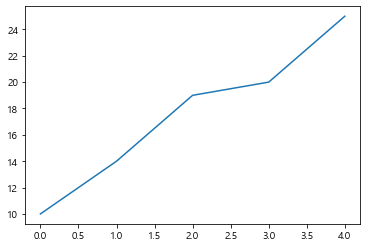

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x = [10, 14, 19, 20, 25]
plt.plot(x)
plt.show()

C:\Users\minch\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\minch\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


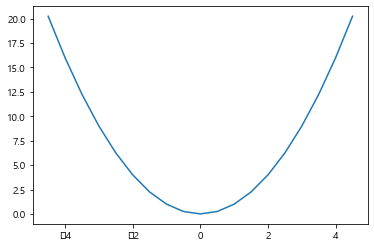

In [17]:
x = np.arange(-4.5, 5, 0.5)
y = x**2
plt.plot(x, y)
plt.show()

## 한번에 여러그래프 그리기

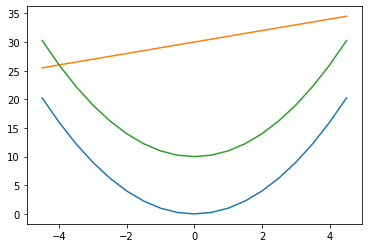

In [4]:
x = np.arange(-4.5, 5, 0.5)

y1 = x**2
y2 = x+30
y3 = x**2+10

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

## plot 옵션

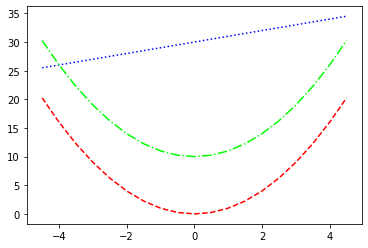

In [7]:
x = np.arange(-4.5, 5, 0.5)

y1 = x**2
y2 = x+30
y3 = x**2+10

plt.plot(x, y1, color="red", linestyle="dashed")
plt.plot(x, y2, "b:")
plt.plot(x, y3, color="#00FF00", linestyle="-.") 
plt.show()

### 축의범위조정

C:\Users\minch\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\minch\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


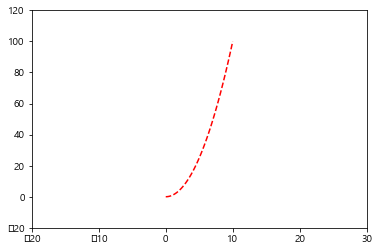

In [19]:
x = np.linspace(0, 10, 100)
y = x ** 2

plt.plot(x, y, '--r')
#plt.xlim(-20, 30)
#plt.ylim(-20, 120)
plt.axis([-20, 30, -20, 120])
plt.show()

### label 과 legend

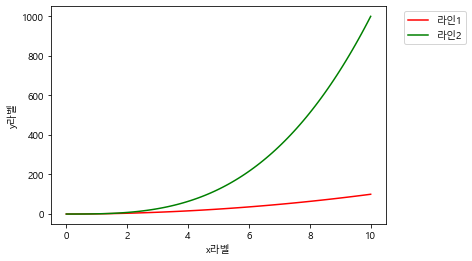

In [15]:
# plt.rc('font', family='AppleGothic') # mac
plt.rc('font', family='Malgun Gothic') # window

x = np.linspace(0, 10, 100)
y1 = x ** 2
y2 = x ** 3

plt.plot(x, y1, 'r', label='라인1')
plt.plot(x, y2, 'g', label='라인2')

plt.xlabel('x라벨')
plt.ylabel('y라벨')

# plt.legend(loc=2) # 선 라벨표 위치(그래프 내)
plt.legend(bbox_to_anchor=(1.04, 1)) # 선 라벨표 위치(그래프 밖)
plt.show()

### subplot
- 한번에 여러개 차트를 표시, plt.subplot(행열순번)

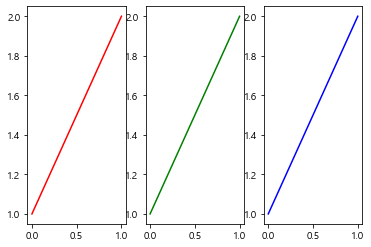

In [21]:
plt.subplot(131)
plt.plot([1, 2], color='r')

plt.subplot(132)
plt.plot([1, 2], color='g')

plt.subplot(133)
plt.plot([1, 2], color='b')

plt.show()

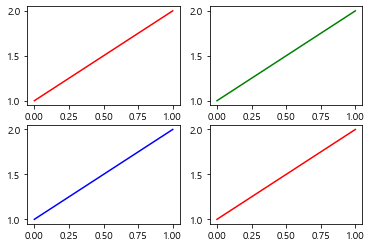

In [23]:
plt.subplot(221)
plt.plot([1, 2], color='r')

plt.subplot(222)
plt.plot([1, 2], color='g')

plt.subplot(223)
plt.plot([1, 2], color='b')

plt.subplot(224)
plt.plot([1, 2], color='r')

plt.show()

###  subplot & gird

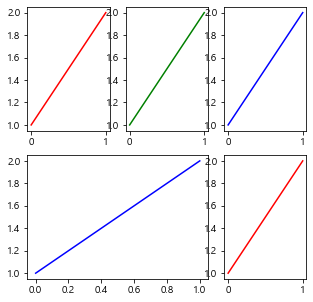

In [29]:
plt.figure(figsize=(5,5)) # 그래프 전체 크기
grid = plt.GridSpec(2,3) # GirdSpec(행, 열)

plt.subplot(grid[0,0])
plt.plot([1,2], color='r')

plt.subplot(grid[0,1])
plt.plot([1,2], color='g')

plt.subplot(grid[0,2])
plt.plot([1,2], color='b')

plt.subplot(grid[1,:2])
plt.plot([1,2], color='b')

plt.subplot(grid[1,2])
plt.plot([1,2], color='r')

plt.show()

### Scatter(산점도)

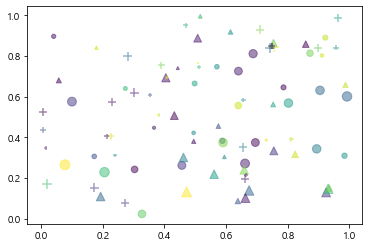

In [31]:
x = np.random.rand(30)
y = np.random.rand(30)
a = np.random.rand(30)
b = np.random.rand(30)
e = np.random.rand(30)
f = np.random.rand(30)
color = np.random.rand(30)

size = 100 * np.random.rand(30)

plt.scatter(x, y, s=size, c=color, alpha=0.5, marker='o')
plt.scatter(a, b, s=size, c=color, alpha=0.5, marker='^')
plt.scatter(e, f, s=size, c=color, alpha=0.5, marker='+')

plt.show()

### Histogram(히스토그램)

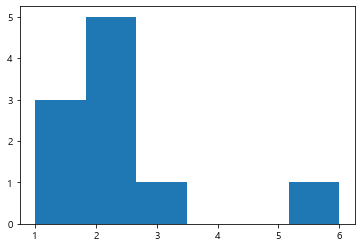

In [34]:
data = [np.random.randint(1,7) for i in range(10)]
plt.hist(data, bins=6, alpha=1)
plt.show()

### Bar(바차트)

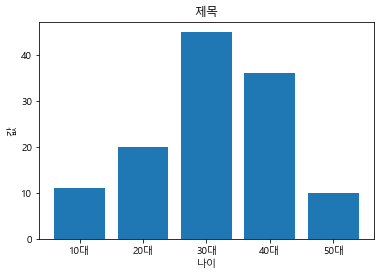

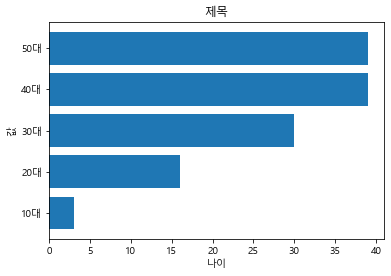

In [36]:
#가로 그래프
plt.bar(['10대', '20대', '30대', '40대', '50대'], [np.random.randint(1,50) for i in range(5)])

plt.title('제목')
plt.xlabel('나이')
plt.ylabel('값')
plt.show()
# 세로 그래프
plt.barh(['10대', '20대', '30대', '40대', '50대'], [np.random.randint(1,50) for i in range(5)])

plt.title('제목')
plt.xlabel('나이')
plt.ylabel('값')
plt.show()

# 실습 01 (타이타닉 생존자체크)

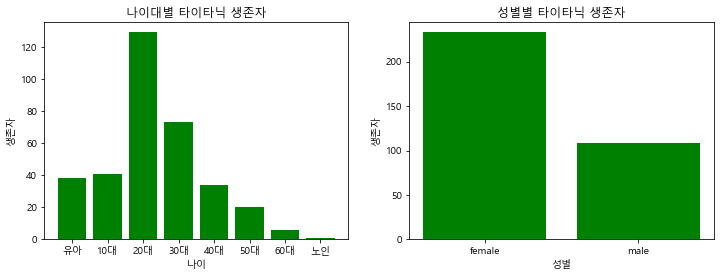

In [48]:
def age_process(n):
    if n >= 70:
        return '노인'
    elif n >= 60:
        return '60대'
    elif n >= 50:
        return '50대'
    elif n >= 40:
        return '40대'
    elif n >= 30:
        return '30대'
    elif n >= 20:
        return '20대'
    elif n >= 10:
        return '10대'
    else :
        return '유아'
    
# 파일 로드
import pandas as pd
file_name = 'titanic_train.csv'
file_path = './data/'
titanic_data = pd.read_csv(file_path+file_name, index_col='PassengerId', header=0, sep=',')

titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Age_Range'] = titanic_data['Age'].apply(age_process)
# titanic_data['Cabin'] = titanic_data['Cabin'].fillna('N')
# titanic_data['Embarked'] = titanic_data['Embarked'].fillna('N')

age_list=[i for i in range(-1, 8)]
x = [titanic_data.groupby('Age_Range').sum()['Survived'].index[i] for i in age_list]
y = [titanic_data.groupby('Age_Range').sum()['Survived'].values[i] for i in age_list]

plt.figure(figsize=(12,4)) # 그래프 전체 크기
grid = plt.GridSpec(1,2) # GirdSpec(행, 열)
plt.rc('font', family='Malgun Gothic') 

plt.subplot(grid[0,0])
plt.bar(x, y, color ='g')
plt.title('나이대별 타이타닉 생존자')
plt.xlabel('나이')
plt.ylabel('생존자')

plt.subplot(grid[0,1])
plt.bar(titanic_data.groupby('Sex').sum()['Survived'].index, titanic_data.groupby('Sex').sum()['Survived'].values, color ='g')
plt.rc('font', family='Malgun Gothic') 
plt.title('성별별 타이타닉 생존자')
plt.xlabel('성별')
plt.ylabel('생존자')

plt.show()

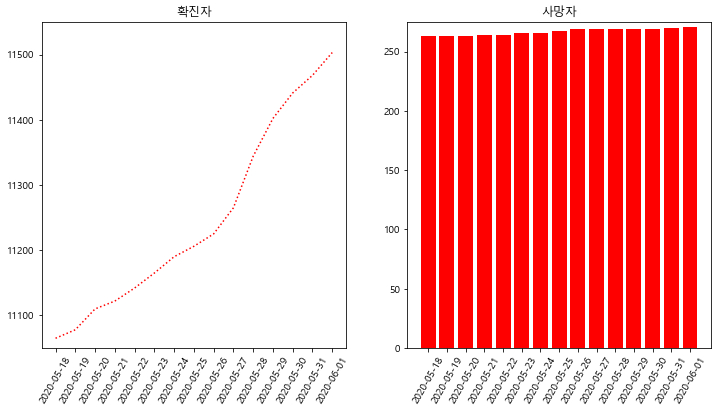

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

daily_data = pd.read_csv('./data/kr_daily.csv', index_col=False, header=0, sep=',')
x = [str(i)[:10] for i in pd.date_range(start='2020-05-18', end='2020-06-01')]
confirmed_list = daily_data[daily_data['date']>20200517]['confirmed']
death_list = daily_data[daily_data['date']>20200517]['death']

plt.figure(figsize=(12,6)) # 그래프 전체 크기
grid = plt.GridSpec(1,2) # GirdSpec(행, 열)
plt.rc('font', family='Malgun Gothic') 

plt.subplot(grid[0,0])
plt.plot(x, confirmed_list, color='r', linestyle='dotted')
plt.xticks(rotation = x_text_rotation)
plt.ylim(11050,11550)
plt.title('확진자')

plt.subplot(grid[0,1:])
plt.bar(x, death_list, color ='r')
plt.xticks(rotation = x_text_rotation)
plt.ylim(0,275)
plt.title('사망자')

plt.show()
